<a href="https://colab.research.google.com/github/mhoch123/MAT422/blob/main/HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2.4
Authors: Megan Hoch and Bronwyn Curnow

# 2.4.1. MLE for random samples

**Maximum Likelihood Estimation (MLE):** is an effective approach of estimating the parameter of a probability distribution through maximizing a likelihood function.

**MLE equation:** $\hat{\mu}=\hat{X} \; \; \;\hat{\sigma}^{2}=\frac{\sum (X_{i}-\hat{X})^2}{n}$

<function matplotlib.pyplot.show(close=None, block=None)>

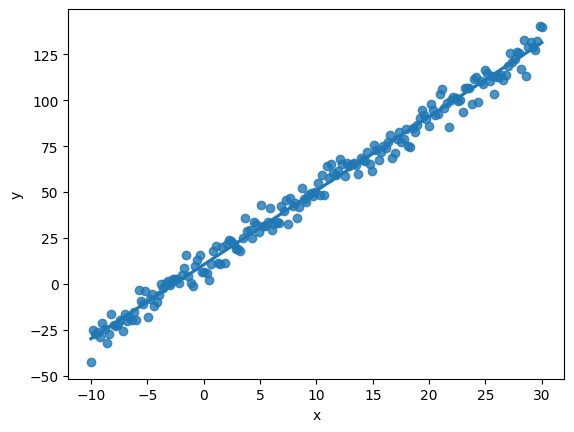

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

n = 200
x = np.linspace(-10, 30, n)
z = np.random.normal(10, 5, 200)
y = 4*x + z

data = pd.DataFrame({'x':x, 'y':y})
sns.regplot(x='x', y='y', data = data)
plt.show


Here we create a semi random variable, and plot it's linear regression line.

In [ ]:
data['constant'] = 1

X = data[['constant', 'x']]
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Thu, 03 Oct 2024   Prob (F-statistic):          3.85e-196
Time:                        01:00:20   Log-Likelihood:                -602.38
No. Observations:                 200   AIC:                             1209.
Df Residuals:                     198   BIC:                             1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
thing         10.4639      0.461     22.679      0.000       9.554      11.374
x              4.0313      0.030    133.845      0.000       3.972       4.091
==============================================================================
Omnibus:                        1.247   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.185
Skew:                          -0.187   Prob(JB):                        0.553
Kurtosis:                       2.959   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This OSL model will give us a basis for comparison for our MLE that we will do in the following steps.

In [ ]:
def MLE(parameters):
  predicted_val = parameters[0] + parameters[1]*x
  return -1*np.sum(stats.norm.logpdf(y,predicted_val,parameters[2]))

This method defines the MLE.

In [ ]:
guess_vals = np.array([3,3,3])
MLE_val = minimize(MLE, guess_vals, method = 'Nelder-Mead')
MLE_val

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 596.0521071353365
             x: [ 1.061e+01  3.974e+00  4.765e+00]
           nit: 109
          nfev: 191
 final_simplex: (array([[ 1.061e+01,  3.974e+00,  4.765e+00],
                       [ 1.061e+01,  3.974e+00,  4.765e+00],
                       [ 1.061e+01,  3.974e+00,  4.765e+00],
                       [ 1.061e+01,  3.974e+00,  4.765e+00]]), array([ 5.961e+02,  5.961e+02,  5.961e+02,  5.961e+02]))

As we can see, the x array produced here is roughly the same as what we see in the OLS model!

# 2.4.2. Linear regression

**Derived MLE estimate:** $\hat{\beta} =arg max \wp(\beta|y)=arg max_{\beta} \sum\limits_{i=1}\limits^{n}(y_{i}-\hat{y}_{i})^{2}$